In [19]:
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

# 1. Logistic Regression for Binary Classification (2 points)

In multiclass classification we typically use the exponential model 

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

$$p(y|\mathbf{o}+c) = \mathrm{softmax}(\mathbf{o}+c)_y = \frac{\exp(o_y+c)}{\sum_{y'} \exp(o_{y'}+c)}$$

$$ = \mathrm{softmax}(\mathbf{o}+c)_y = \frac{\exp(o_y)\exp(c)}{\sum_{y'} \exp(o_{y'})\exp(c)}$$

$$ = \mathrm{softmax}(\mathbf{o}+c)_y = \frac{\exp(o_y)\exp(c)}{\exp(c)\sum_{y'} \exp(o_{y'})}$$

$$= \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

As $o \to \infty$, $\exp(-y \cdot o) \to 0$,  therefore, $\log (1 + \exp(-y \cdot o)) \to 0$

As $o \to -\infty$, $\exp(-y \cdot o) \to \infty$,  therefore, $\log (1 + \exp(-y \cdot o)) \to \infty$

# 2. Logistic Regression and Autograd (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in Gluon
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ using 'autograd'.

I used the mxnet softmax regression example from class and the textbook to get some of the code (more of the import statments and structural framework of the program).

In [ ]:
!pip install d2l==0.16.1
!pip install -U mxnet-cu101==1.7.0

In [21]:
# For automatically computing gradients of numpy functions
from mxnet import autograd
# mxnet's version of numpy, which is autograd-friendly
from mxnet import np
# mxnet's neural network + accelerator extensions for numpy
from mxnet import npx
# mxnet's neural network framework (only for data loading here)
from mxnet import gluon
# Tell mxnet to be as numpy-compatible as possible
npx.set_np()

from IPython import display

In [58]:
def bin_log_loss(y,o):
  return np.log(1 + np.exp(-y * o))

Text(0, 0.5, 'Loss when y=1')

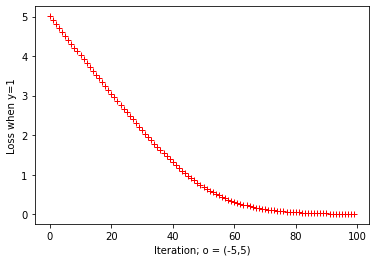

In [71]:
O = np.arange(-5, 5, 0.1)

losses = []

for o in O:
    losses.append(bin_log_loss(1, o))

plt.plot(losses, 'r+')
plt.xlabel("Iteration; o = (-5,5)")
plt.ylabel("Loss when y=1")

Text(0, 0.5, 'Loss when y=-1')

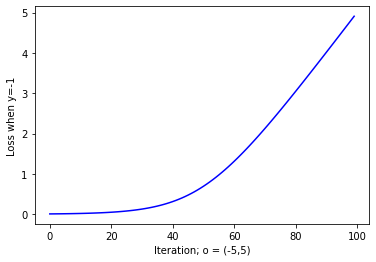

In [67]:
O = np.arange(-5, 5, 0.1)

losses = []

for o in O:
    losses.append(bin_log_loss(-1, o))

plt.plot(losses, 'b')
plt.xlabel("Iteration; o = (-5,5)")
plt.ylabel("Loss when y=-1")

Text(0, 0.5, 'Gradient of Loss with respect of o when y=1')

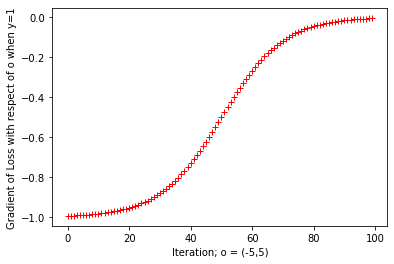

In [75]:
O = np.arange(-5, 5, 0.1)
O.attach_grad()
with autograd.record():
  y = bin_log_loss(1, O)

y.backward()
plt.plot(O.grad, 'r+')
plt.xlabel("Iteration; o = (-5,5)")
plt.ylabel("Gradient of Loss with respect of o when y=1")

Text(0, 0.5, 'Gradient of Loss with respect of o when y=-1')

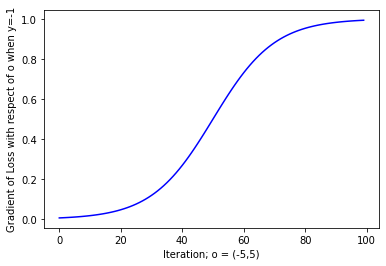

In [78]:
O = np.arange(-5, 5, 0.1)
O.attach_grad()
with autograd.record():
  y = bin_log_loss(-1, O)

y.backward()
plt.plot(O.grad, 'b')
plt.xlabel("Iteration; o = (-5,5)")
plt.ylabel("Gradient of Loss with respect of o when y=-1")

# 3. T-shirt vs. Trouser classification (2 points)

1. Implement a logistic regression model on the Fashion MNIST datasets that classifies between t-shirts and trousers, rather than all 10 of the classes. Feel free to use the [softmax regression code from the textbook](http://d2l.ai/chapter_linear-networks/softmax-regression-scratch.html), but use the binary logistic loss you defined above (which assumes that the labels are -1 or 1) rather than a softmax cross-entropy loss. This will require creating custom version of the `d2l.load_data_fashion_mnist` that removes any examples that are not t-shirts or trousers, and maps the labels to -1 and 1.
2. After implementing this model and getting it to work, try changing the learning rate and weight initialization scale. Can you get the model to train more quickly? What values of these hyperparameters result in bad models/poor training dynamics?

*Note*: Don't forget to change the runtime type to "GPU" to speed things up!